### 意图识别（Intent Recognition）

意图识别（Intent Recognition）是指通过自然语言文本来**自动识别出用户的意图或目的**的一项技术任务。在人机交互、语音识别、自然语言处理等领域中，意图识别扮演着至关重要的角色。

意图识别有很多用途，例如在搜索引擎中分析用户的核心搜索需求，在对话系统中了解用户想要什么业务或者闲聊，在身份识别中判断用户的身份信息等等。意图识别可以提高用户体验和服务质量。

#### 任务1：数据读取与分析

#### 步骤1：
下载意图识别数据集，该数据集是一个多分类任务，目标是根据用户的输入文本判断用户的意图。意图识别数据集的下载地址和练习平台如下：https://competition.coggle.club/

#### 步骤2：
使用Pandas库读取数据集，Pandas是一个用于数据分析和处理的Python库，可以方便地读取、操作和保存各种格式的数据文件。使用Pandas的read_csv函数可以读取csv格式的数据文件，并返回一个DataFrame对象。



In [3]:
import pandas as pd

train_data = pd.read_csv("Coggle比赛数据/对话意图识别/train.csv", sep="\t", header=None, names=["text", "target"])
test_data = pd.read_csv("Coggle比赛数据/对话意图识别/test.csv", sep="\t", header=None, names=["text"])

In [11]:
train_data.head()

,text,target
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query
1,从这里怎么回家,Travel-Query
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play
3,给看一下墓王之王嘛,FilmTele-Play
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play


In [12]:
test_data.head()

,text
0,回放CCTV2的消费主张
1,给我打开玩具房的灯
2,循环播放赵本山的小品相亲来听
3,15号上午10点带孩子去海洋馆的行程帮我制定下。
4,把智能扫地机器人关掉


#### 步骤3：
统计训练集和测试集的类别分布、文本长度等基本信息，以了解数据集的特征和难度。使用DataFrame对象的value_counts函数可以统计每个类别出现的次数和比例，使用apply函数和len函数可以统计每个文本的长度。

##### 类别分布

In [13]:
train_data.describe()

,text,target
count,12100,12100
unique,12073,12
top,明天是星期几,FilmTele-Play
freq,3,1355


In [20]:
# 统计每个类别出现的次数
train_data["target"].value_counts(dropna=False)

FilmTele-Play            1355
Video-Play               1334
Music-Play               1304
Radio-Listen             1285
Alarm-Update             1264
Weather-Query            1229
Travel-Query             1220
HomeAppliance-Control    1215
Calendar-Query           1214
TVProgram-Play            240
Audio-Play                226
Other                     214
Name: target, dtype: int64

In [59]:
import matplotlib.pyplot as plt

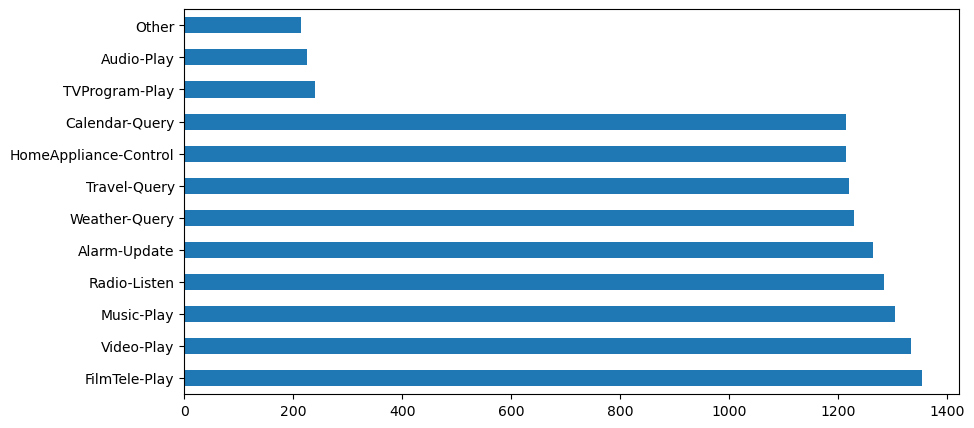

In [39]:
plt.figure(figsize=(10, 5))
train_data["target"].value_counts(dropna=False).plot(kind='barh')
plt.show()

In [19]:
# 标准化normalize=True 查看占比
train_data["target"].value_counts(normalize=True)

FilmTele-Play            0.111983
Video-Play               0.110248
Music-Play               0.107769
Radio-Listen             0.106198
Alarm-Update             0.104463
Weather-Query            0.101570
Travel-Query             0.100826
HomeAppliance-Control    0.100413
Calendar-Query           0.100331
TVProgram-Play           0.019835
Audio-Play               0.018678
Other                    0.017686
Name: target, dtype: float64

从上述统计结果中可以看出：训练数据中除了类别“TVProgram-Play”、“Audio-Play”、“Other”占比较少外，其他类别占比较为均匀。

##### 文本长度

In [29]:

train_data['text'].apply(len).median()

15.0

In [30]:

test_data['text'].apply(len).median()

15.0

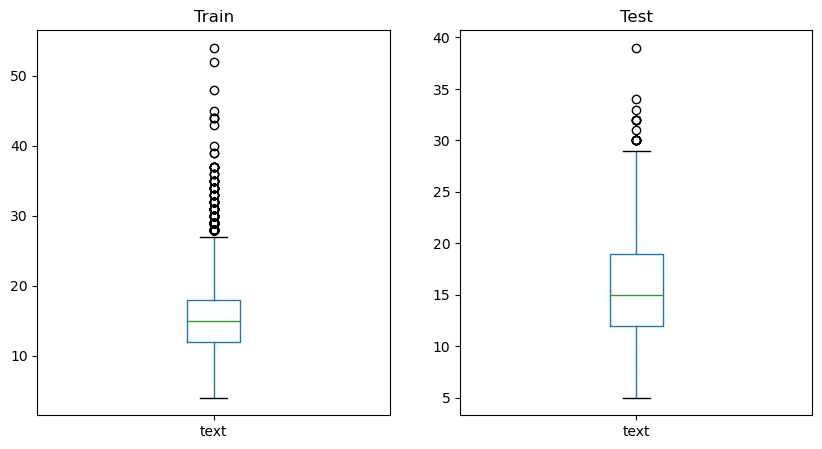

In [26]:


plt.figure(figsize=(10, 5))

plt.subplot(121)
train_data['text'].apply(len).plot(kind='box')
plt.title('Train')

plt.subplot(122)
test_data['text'].apply(len).plot(kind='box')
plt.title('Test')
plt.show()



该次训练数据集文本长度中位数同测试集的一致，均为15，训练数据集文本长度离群点较多，测试集离群点较少，相对分布比较均匀。

In [10]:
all_content = ''.join(train_data['text']) + ''.join(test_data['text'])

In [11]:
print("数据集中总共包含了%d个字符" %(len(all_content)))

数据集中总共包含了230831个字符


In [12]:
# 使用jieba进行分词统计单词个数
import jieba
vocabulary = jieba.lcut(all_content)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wyf35\AppData\Local\Temp\jieba.cache
Loading model cost 0.608 seconds.
Prefix dict has been built successfully.


In [13]:
print("数据集中总共包含了%d个单词" %(len(vocabulary)))

数据集中总共包含了136755个单词


按照意图类别绘制词云图

In [4]:
all_target = train_data["target"].unique().tolist()

In [5]:
all_target

['Travel-Query',
 'Music-Play',
 'FilmTele-Play',
 'Video-Play',
 'Radio-Listen',
 'HomeAppliance-Control',
 'Weather-Query',
 'Alarm-Update',
 'Calendar-Query',
 'TVProgram-Play',
 'Audio-Play',
 'Other']

In [7]:
from wordcloud import wordcloud

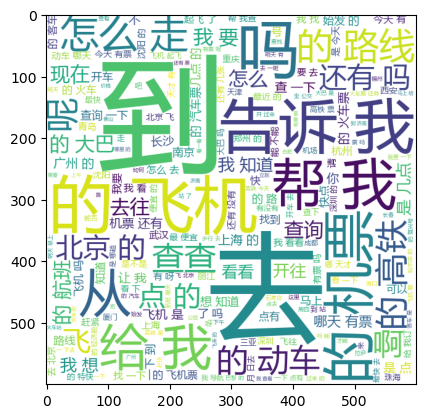

In [128]:
content = ''.join(train_data[train_data['target'].str.contains('Travel-Query')]['text'])
wc = wordcloud.WordCloud(background_color = 'white',width=600,height=600,font_path = 'msyh.ttc')
wc.generate(' '.join(jieba.lcut(content)))
plt.show(wc)


In [14]:
for target in all_target:
    content = ''.join(train_data[train_data['target'].str.contains(target)]['text'])
    wc = wordcloud.WordCloud(background_color = 'white',width=800,height=600,max_words = 1000,font_path = 'msyh.ttc')
    wc.generate(' '.join(jieba.lcut(content)))
    wc.to_file('result/' + target + 'ciyun.jpg')

> 未去停用词的话存在大量的无用词，因此增加去停用词的处理。

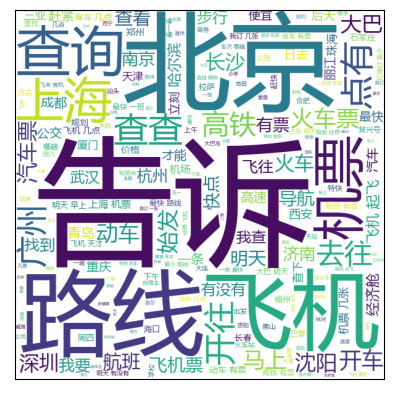

In [124]:
content = ''.join(train_data[train_data['target'].str.contains('Travel-Query')]['text'])
stop_words = [line.strip().lstrip() for line in open("stop_words.txt", 'r', encoding='utf-8').readlines()]
cut_words = [k for k in jieba.lcut(content, cut_all=False) if ((k not in stop_words)and(len(k)>1))]
wc = wordcloud.WordCloud(background_color = 'white',width=600,height=600,font_path = 'msyh.ttc')
wc.generate(' '.join(cut_words))
plt.show(wc)


In [90]:
for target in all_target:
    content = ''.join(train_data[train_data['target'].str.contains(target)]['text'])
    stop_words = [line.strip().lstrip() for line in open("stop_words.txt", 'r', encoding='utf-8').readlines()]
    cut_words = [k for k in jieba.lcut(content, cut_all=False) if ((k not in stop_words)and(len(k)>1))]
    wc = wordcloud.WordCloud(background_color = 'white',width=800,height=600,max_words = 1000,font_path = 'msyh.ttc')
    wc.generate(' '.join(cut_words))
    wc.to_file('result/' + target + 'stopword_ciyun.jpg')

##### 步骤4：

通过上述步骤，请回答下面问题:

* 数据集的类别分布一致吗？根据统计结果，比较训练集和测试集中每个类别出现的次数和比例是否相近。
    * 训练集中除了三个类别“TVProgram-Play”、“Audio-Play”、“Other”占比较少外，其他类别分布均匀。
* 数据集中的文本是长文本还是短文本？根据统计结果，查看每个文本的长度分布情况，如文本长度的中位数。
    * 文本为短文本，训练集和测试集的中位数为15。
* 数据集中总共包含了多少个字符，多少个单词？将单词按照意图类别绘制云图。